<a href="https://colab.research.google.com/github/Karansaini260/ds_-Karandeep_Singh-/blob/main/Traders_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will pick a historical trader data for analysis purpose to see the behaviour of traders i.e. we will perform EDA and PCA for analysis then Visually represent the data.

In [ ]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Load a data
df = pd.read_csv("/content/historical_data.csv")

In [ ]:
# see random values from dataset
df.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
115097,0x8477e447846c758f5a675856001ea72298fd9cb5,AIXBT,0.15971,6828.0000,1090.50,SELL,30-04-2025 13:14,-19203.000,Open Short,0.000000,0x827a0c7047b0f81e5e17042286f2df01d000c8f8d33e...,89928623767,True,0.381674,8.910000e+14,1.750000e+12
51235,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,16.42000,30.7000,504.09,BUY,06-03-2025 19:01,2612.480,Open Long,0.000000,0x18722aa335a3201c9f48041f05797f02026700d59734...,77653488479,True,0.176432,8.350000e+14,1.740000e+12
67990,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,19.31800,0.7700,14.87,BUY,25-02-2025 05:41,249785.830,Open Long,0.000000,0x7ad2e2a2a5be30321543041e6801840000fac24d1c0e...,74600473556,False,0.000713,1.010000e+14,1.740000e+12
136233,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,VIRTUAL,3.91530,28.1000,110.02,BUY,07-01-2025 20:11,-160.300,Close Short,2.959492,0xb942f9275aff325301f4041ae2dff0020199004e406d...,61169739683,True,0.038506,2.380000e+14,1.740000e+12
163830,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,ETH,3366.90000,0.0044,14.81,BUY,21-12-2024 22:18,-45.333,Close Short,0.352440,0x554f0bdc8eaefb47f4d00419c1b68d02030c004b2c31...,57444455074,True,0.004444,6.100000e+14,1.730000e+12


In [ ]:
# Check columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

It means dataset have 211224 rows and 16 columns thats pritty huge also it have a different datatypes now i will check missing values in it.

In [ ]:
# Null values
df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


Their is no missing value in it

In [ ]:
# Statistically check the data
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In a Statistical analysis we see some check points:

1. The standard deviation is very far from mean it means their is a very high varience in it.
2. In min ,25%, 50% and 75%  (size token) takes high value and (execution price) is less either 75% to max (size token) is low and (execution price) is high , it directly indicates outliers.

In [ ]:
# Check the shape
df.shape

(211224, 16)

<Axes: >

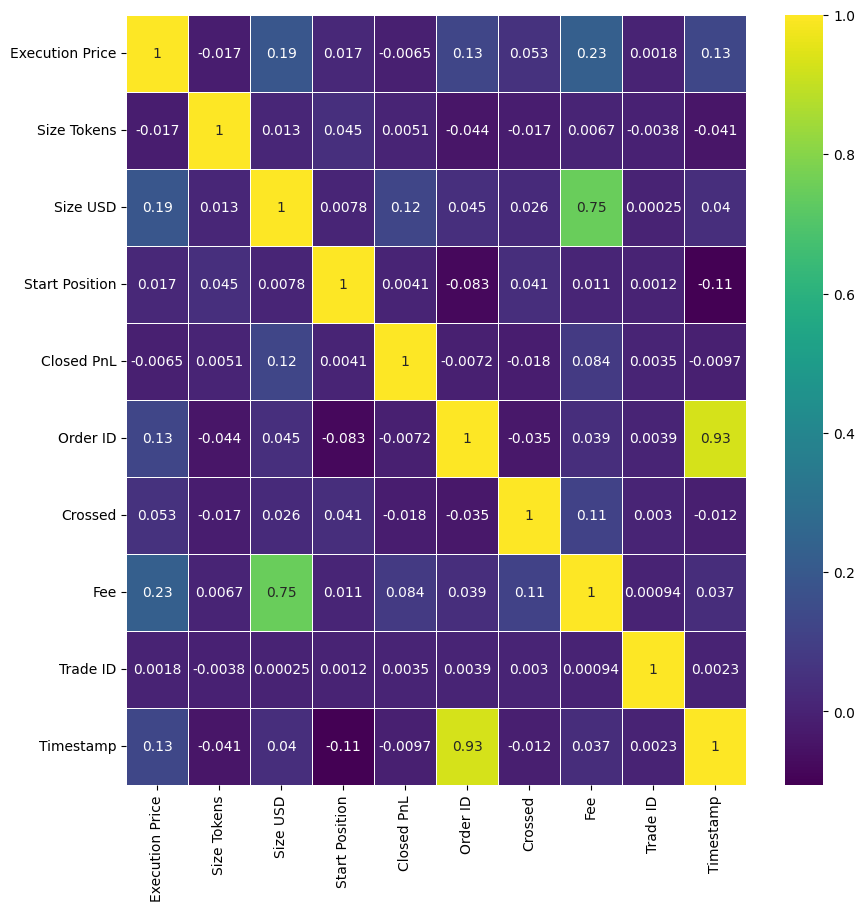

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis",linewidths=0.5)

Their is close relationship between Time Stamp -- order id
and size Usd - fee

# Start EDA

See which columns are important for us .

In [ ]:
df['Account'].value_counts()

,count
Account,
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,15605
0x8477e447846c758f5a675856001ea72298fd9cb5,14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
0x513b8629fe877bb581bf244e326a047b249c4ff1,12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,8519


In this column we see their is a person who takes a maximum transactions.

In [ ]:
df['Coin'].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


In [ ]:
df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [ ]:
df['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


In [ ]:
df['Timestamp IST'].value_counts()

,count
Timestamp IST,
14-02-2025 00:31,441
25-02-2025 05:23,432
07-03-2025 20:39,376
03-03-2025 12:25,366
24-02-2025 13:36,359
...,...
07-12-2024 12:31,1
26-09-2024 19:05,1
26-09-2024 18:57,1


In [ ]:
df['Transaction Hash'].value_counts()

,count
Transaction Hash,
0x0000000000000000000000000000000000000000000000000000000000000000,9032
0x8543ffeb4fdab50bfa0304222f29b702012700b5ee6b85c21ed9215e3bc8ba45,298
0xb3a9e6e4f5293d501bb3041f5c49ec02018b00ecdfb8798414bcd103222f2c30,247
0xa67acabfc24d0cb5d05b041f1704590204f000525423d8cded7ec70825f7b658,240
0x6b313e029807198fba0f04215de94801ac001092edd85e7c214059795735b0c6,223
...,...
0x9d81b3aa1287b4dbffc8041fad78dd0166002624199de7bd95dd630305587677,1
0xd8491b9002714d05b63a041fad78d901bc002b62922aa72438efb81505c04cdd,1
0x89fec1ce0438c702e5a2041fad7745020145000b3d056ecfd1bad513d30b20a7,1


In [ ]:
df['Crossed'].value_counts()

,count
Crossed,
True,128403
False,82821


Drop those columns which have not relationship between other columns.

In [ ]:
df =df.drop(['Transaction Hash','Crossed','Order ID','Fee','Trade ID'],axis=1)

In [ ]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,1.750000e+12


Get The Top Accounts

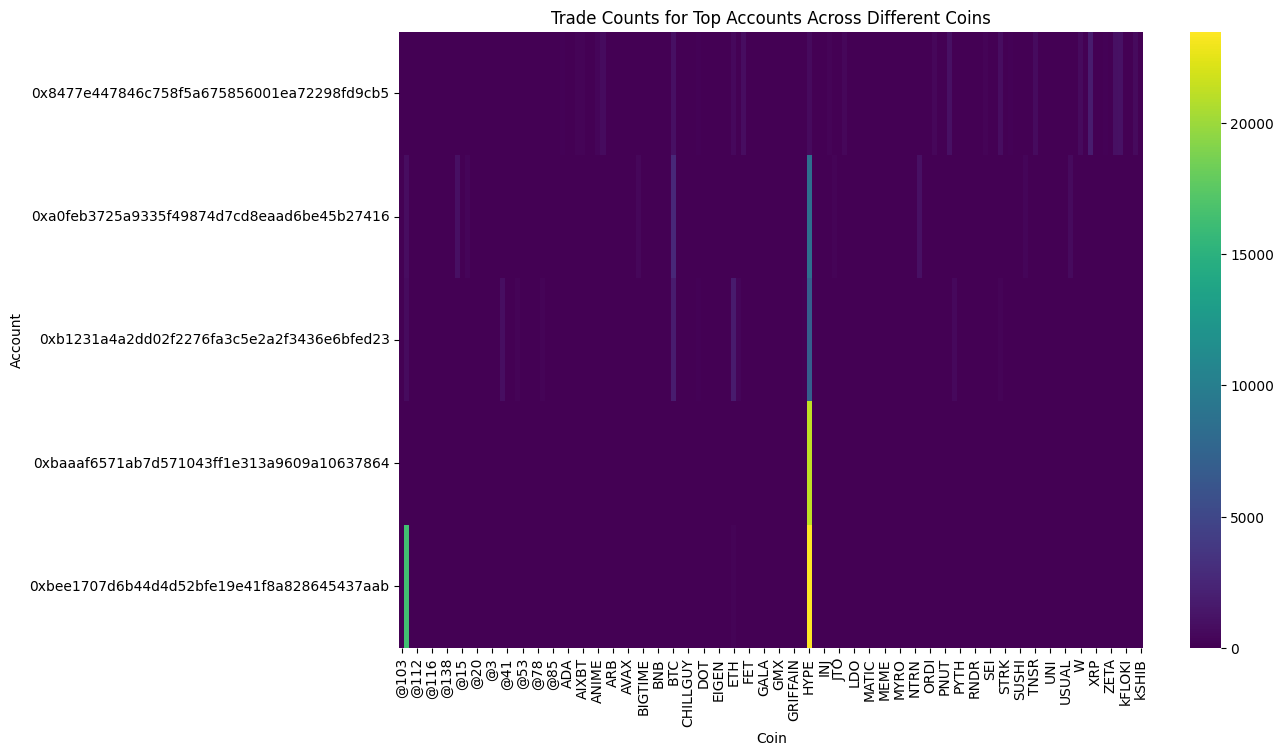

In [ ]:
# Get the top accounts
top_accounts = df['Account'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top accounts
df_top_accounts = df[df['Account'].isin(top_accounts)]

# Create a cross-tabulation of the top accounts and coins
cross_tab = pd.crosstab(df_top_accounts['Account'], df_top_accounts['Coin'])

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="viridis")
plt.title('Trade Counts for Top Accounts Across Different Coins')
plt.xlabel('Coin')
plt.ylabel('Account')
plt.show()

In this Graph we will see that mostly top accounts are show there interest in HBAR and @103.

Get The Smallest Account

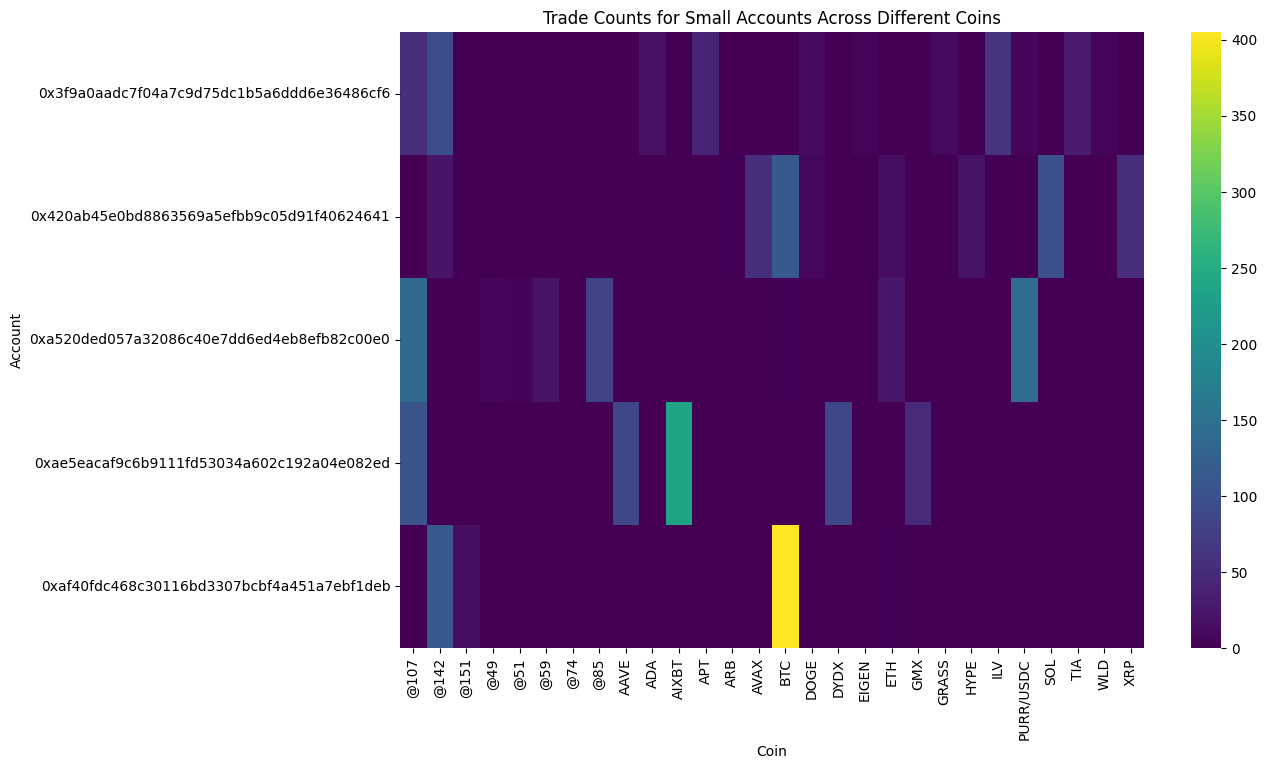

In [ ]:
top_accounts = df['Account'].value_counts().nsmallest(5).index

df_top_accounts = df[df['Account'].isin(top_accounts)]

cross_tab = pd.crosstab(df_top_accounts['Account'], df_top_accounts['Coin'])

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="viridis")
plt.title('Trade Counts for Small Accounts Across Different Coins')
plt.xlabel('Coin')
plt.ylabel('Account')
plt.show()

This shows small traders interested in BTC.



See a Relationship between Side and Direction

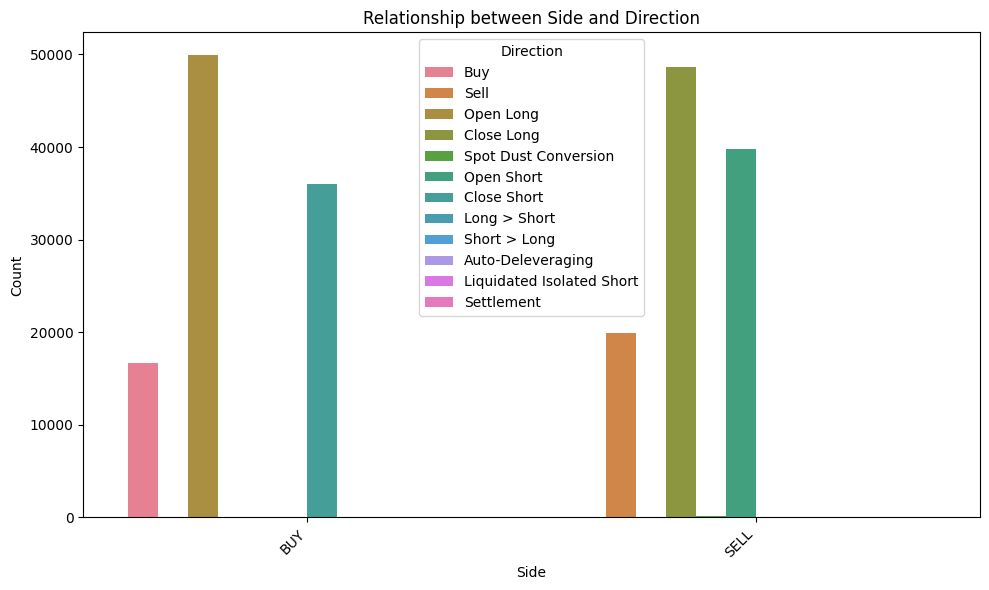

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Side', hue='Direction')
plt.title('Relationship between Side and Direction')
plt.xlabel('Side')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Traders like Open long because the pattern shows Huge investment and long time brings a good profits.

In [ ]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

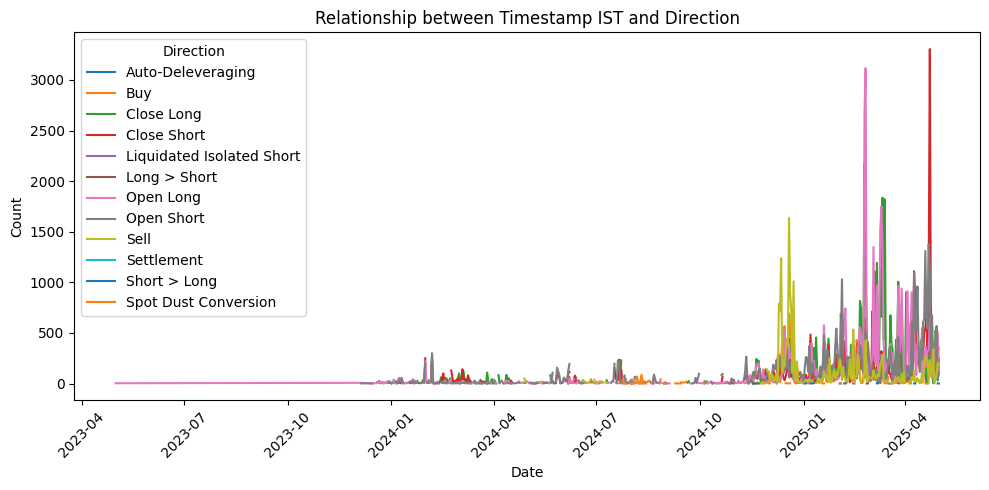

In [ ]:
plt.figure(figsize=(10,5))
df.groupby([df['Timestamp IST'].dt.date, 'Direction']).size().unstack().plot(kind='line', ax=plt.gca())
plt.title('Relationship between Timestamp IST and Direction')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

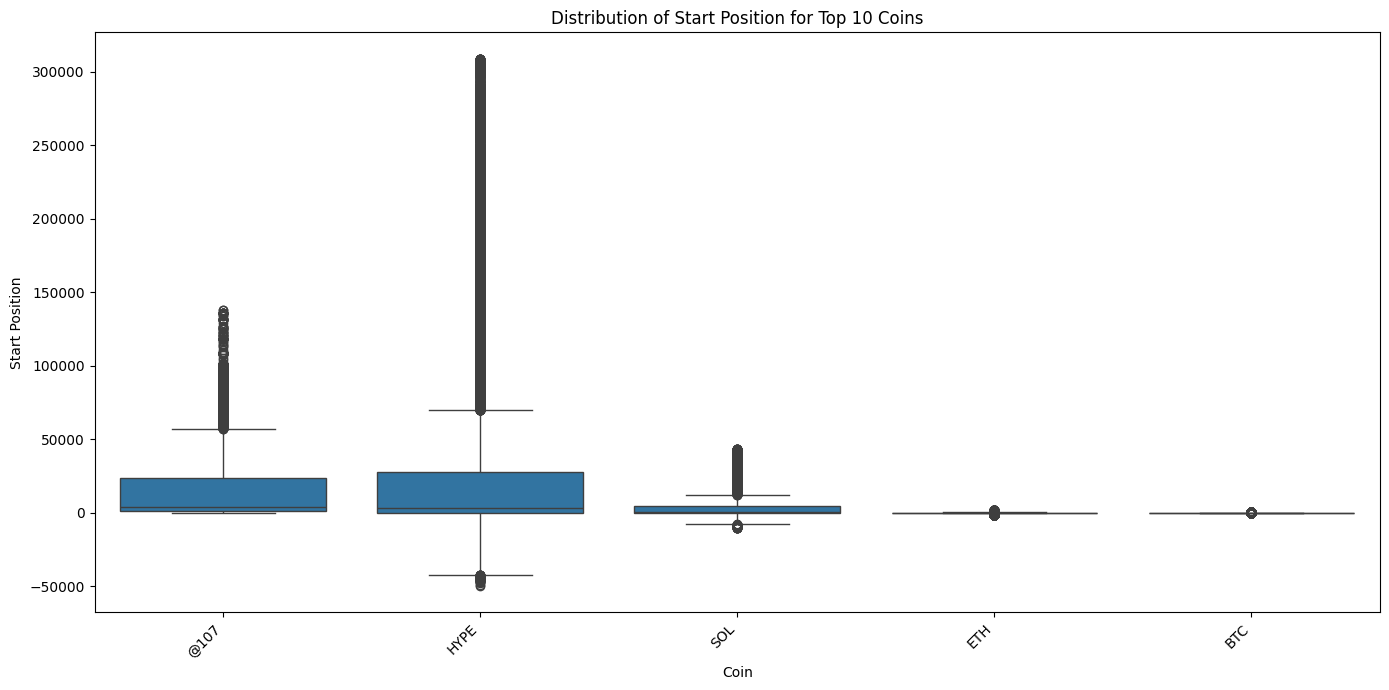

In [ ]:
# Get the top coins
top_coins = df['Coin'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top coins
df_top_coins = df[df['Coin'].isin(top_coins)]

# Create a box plot to visualize the relationship between 'Start Position' and top coins
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_coins, x='Coin', y='Start Position')
plt.title('Distribution of Start Position for Top 10 Coins')
plt.xlabel('Coin')
plt.ylabel('Start Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

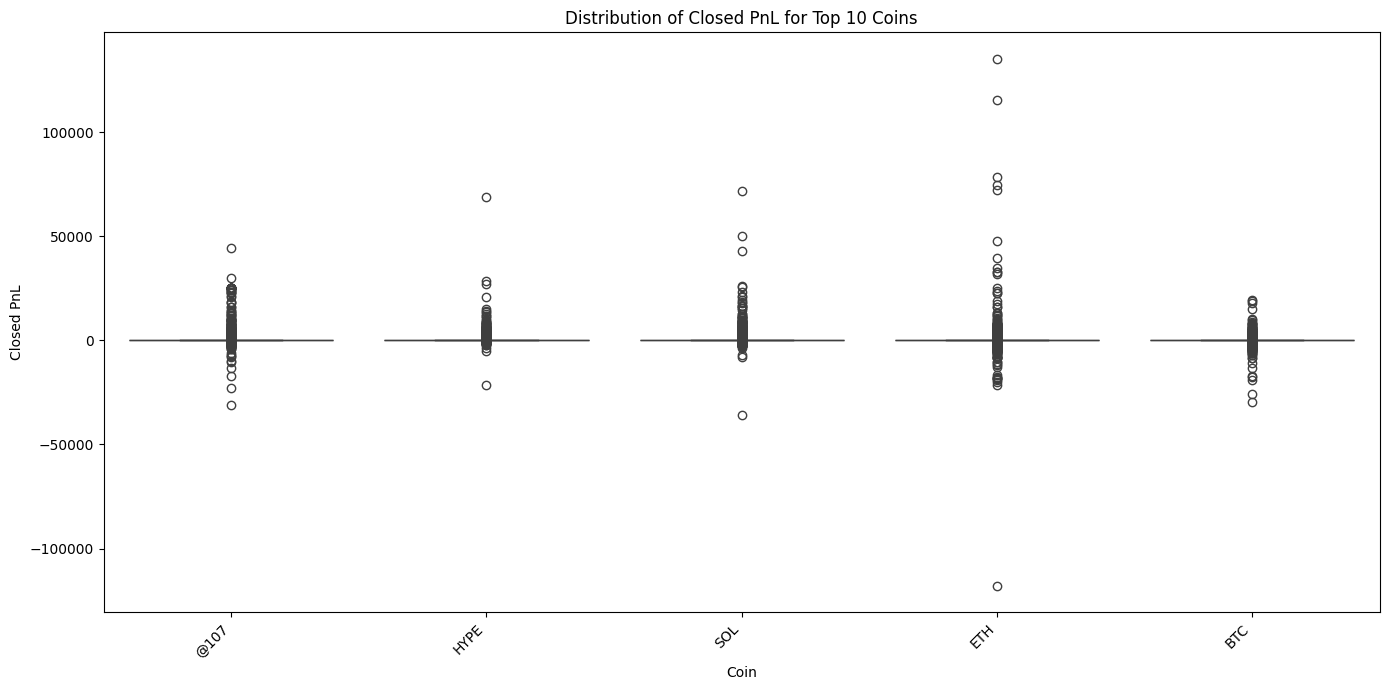

In [ ]:
# Get the top coins (if not already defined)
top_coins = df['Coin'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top coins (if not already defined)
df_top_coins = df[df['Coin'].isin(top_coins)]

# Create a box plot to visualize the relationship between 'Closed PnL' and top coins
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_coins, x='Coin', y='Closed PnL')
plt.title('Distribution of Closed PnL for Top 10 Coins')
plt.xlabel('Coin')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.0,Buy,0.0,1.730000e+12


Based on the columns in the dataset, we can directly analyze profitability using the 'Closed PnL' column, and volume using the 'Size Tokens' and 'Size USD' columns.

The dataset does not explicitly contain columns for risk or leverage. However, we might be able to infer or calculate aspects related to risk and leverage from the existing data:

Risk: Could potentially be analyzed by looking at the volatility of 'Closed PnL', the size of 'Start Position' relative to the account size (if account size were available), or the frequency and size of losing trades.


/tmp/ipython-input-26-4056019983.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Start Position', y='Closed PnL', alpha=0.5,palette='Blues')


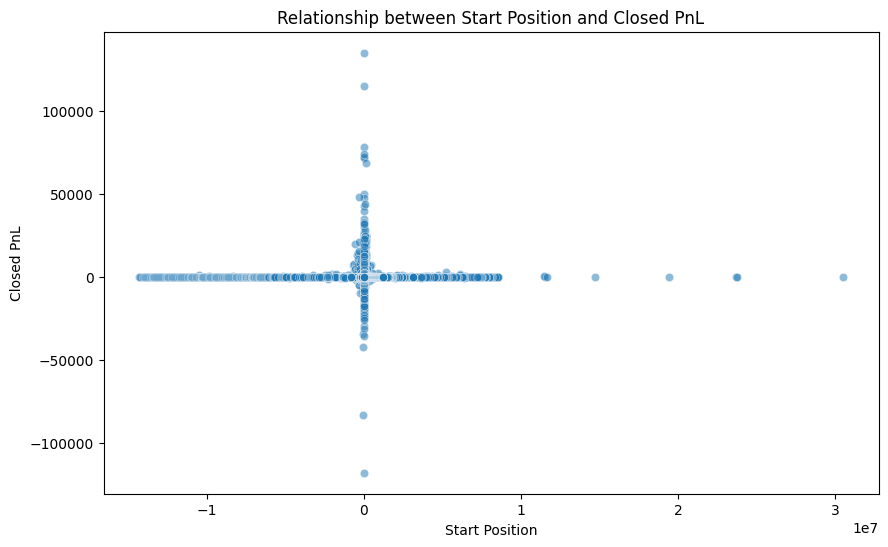

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Start Position', y='Closed PnL', alpha=0.5,palette='Blues')
plt.title('Relationship between Start Position and Closed PnL')
plt.xlabel('Start Position')
plt.ylabel('Closed PnL')
plt.show()

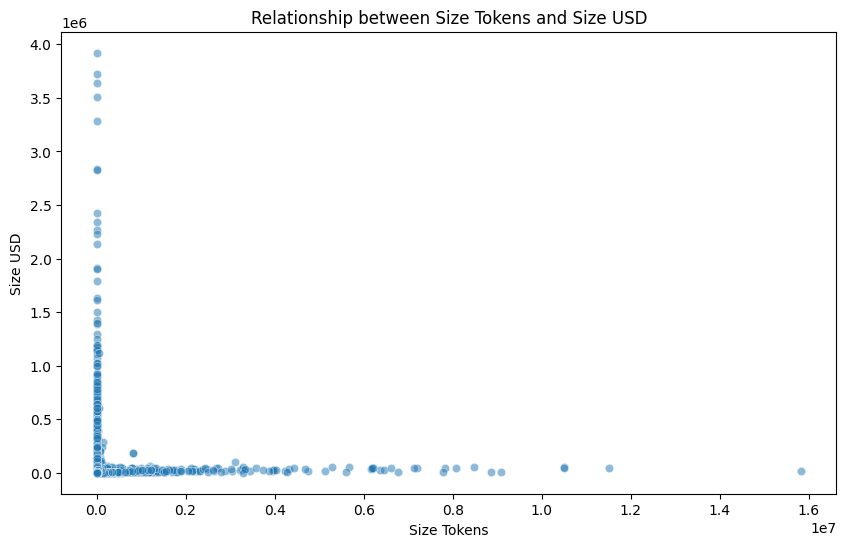

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size Tokens', y='Size USD', alpha=0.5)
plt.title('Relationship between Size Tokens and Size USD')
plt.xlabel('Size Tokens')
plt.ylabel('Size USD')
plt.show()

In [ ]:
# Filter trades with negative Closed PnL (losing trades)
losing_trades = df[df['Closed PnL'] < 0]

# Count the number of losing trades per account and sort in descending order
losing_trades_by_account = losing_trades['Account'].value_counts().reset_index()
losing_trades_by_account.columns = ['Account', 'Number of Losing Trades']

# Display the accounts with the most losing trades
print("Accounts with the most losing trades:")
display(losing_trades_by_account.head(10))

Accounts with the most losing trades:


,Account,Number of Losing Trades
0,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,5343
1,0x8477e447846c758f5a675856001ea72298fd9cb5,2630
2,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1312
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,943
4,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,934
5,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,652
6,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,638
7,0x39cef799f8b69da1995852eea189df24eb5cae3c,591
8,0x8170715b3b381dffb7062c0298972d4727a0a63b,580
9,0x513b8629fe877bb581bf244e326a047b249c4ff1,573


In [ ]:
Another_loosing_trade = df['Start Position'].value_counts()
Another_loosing_trade.head()

,count
Start Position,
0.00,4085
0.01,121
1.00,83
50.00,64
25.00,40


In [ ]:
# Group by Account and Side and sum the Closed PnL
pnl_by_account_and_side = df.groupby(['Account', 'Side'])['Closed PnL'].sum().reset_index()

# Pivot the table to have accounts as rows, Side as columns, and sum of Closed PnL as values
pnl_pivot = pnl_by_account_and_side.pivot_table(index='Account', columns='Side', values='Closed PnL', fill_value=0)

# Display the resulting table
print("Total Profit/Loss by Account and Side:")
display(pnl_pivot)

Total Profit/Loss by Account and Side:


Side,BUY,SELL
Account,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.625011e+06,-2.478101e+04
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3.136547e+03,4.474877e+04
0x271b280974205ca63b716753467d5a371de622ab,-8.814125e+04,1.770506e+04
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,6.788995e+03,1.256758e+05
0x2c229d22b100a7beb69122eed721cee9b24011dd,-3.344130e+01,1.686914e+05
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,9.494394e+03,-4.069799e+04
0x39cef799f8b69da1995852eea189df24eb5cae3c,2.147836e+04,-7.021444e+03
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,0.000000e+00,5.349625e+04
0x420ab45e0bd8863569a5efbb9c05d91f40624641,1.994622e+05,4.336736e+01


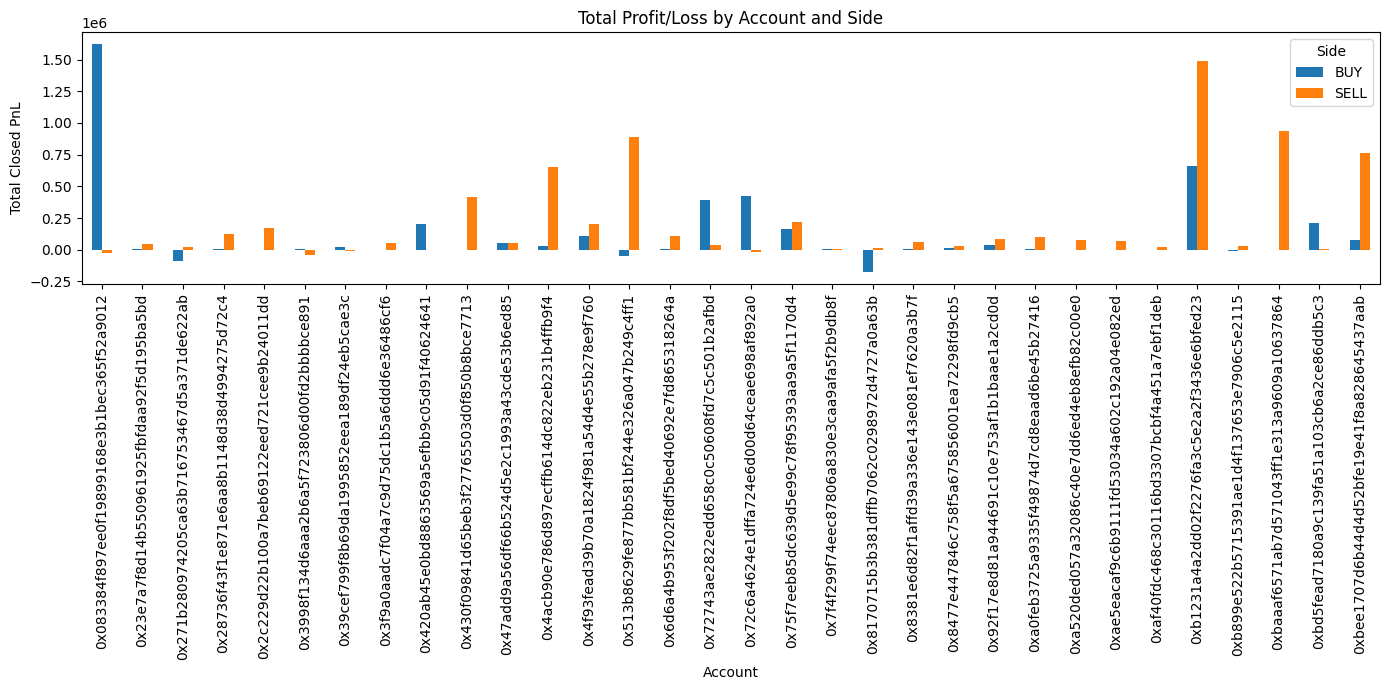

In [ ]:
pnl_pivot.plot(kind='bar', figsize=(14, 7))
plt.title('Total Profit/Loss by Account and Side')
plt.xlabel('Account')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
len(df['Account'].unique())

32

In [ ]:
# Calculate the total profit for each account
pnl_pivot['Total Profit'] = pnl_pivot['BUY'] + pnl_pivot['SELL']

# Sort accounts by total profit in descending order and display the top 10
top_profitable_accounts = pnl_pivot.sort_values(by='Total Profit', ascending=False)

print("Top 10 Most Profitable Accounts:")
display(top_profitable_accounts.head(10))

Top 10 Most Profitable Accounts:


Side,BUY,SELL,Total Profit
Account,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,6.565989e+05,1.486784e+06,2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,1.625011e+06,-2.478101e+04,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,0.000000e+00,9.401638e+05,9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,-4.805536e+04,8.884779e+05,8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,7.456503e+04,7.615155e+05,8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,2.843728e+04,6.493098e+05,6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,3.891458e+05,4.020975e+04,4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000e+00,4.165419e+05,4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,4.212279e+05,-1.821640e+04,4.030115e+05


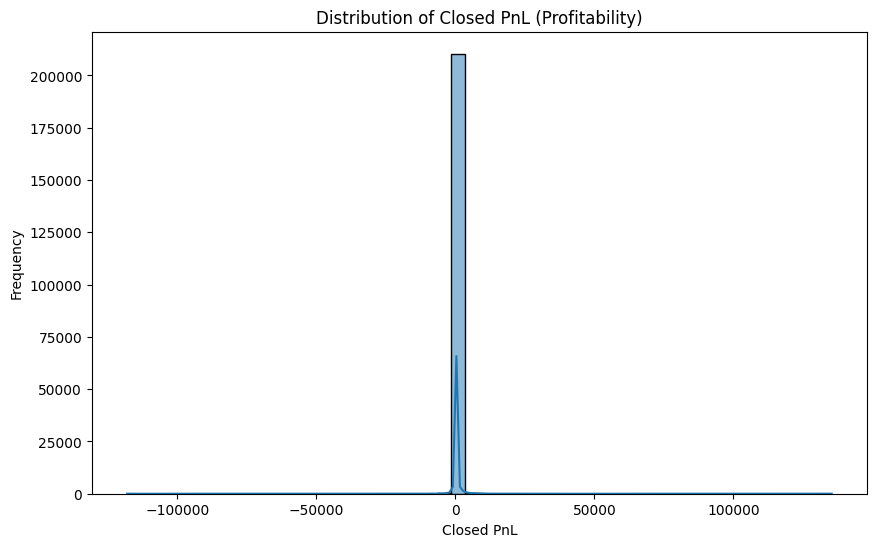

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL (Profitability)')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.show()

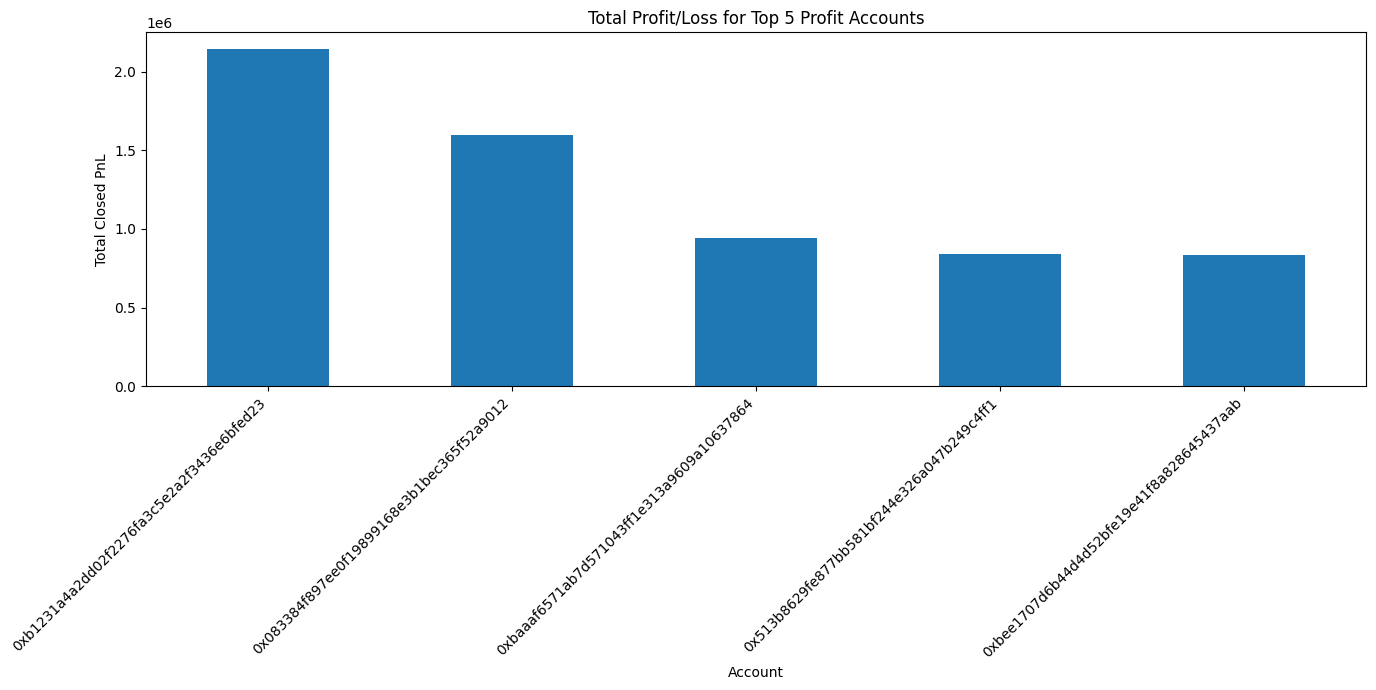

In [ ]:
plt.figure(figsize=(14, 7))
top_profitable_accounts['Total Profit'].head(5).plot(kind='bar')
plt.title('Total Profit/Loss for Top 5 Profit Accounts')
plt.xlabel('Account')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Sort accounts by total profit in ascending order to find the largest losses
top_losing_accounts = pnl_pivot.sort_values(by='Total Profit', ascending=True)

print("Top 5 Accounts with the Largest Losses:")
display(top_losing_accounts.head(10))

Top 5 Accounts with the Largest Losses:


Side,BUY,SELL,Total Profit
Account,,,
0x8170715b3b381dffb7062c0298972d4727a0a63b,-178180.999043,10559.874262,-167621.124781
0x271b280974205ca63b716753467d5a371de622ab,-88141.252242,17705.060924,-70436.191318
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,9494.393839,-40697.993825,-31203.599986
0x39cef799f8b69da1995852eea189df24eb5cae3c,21478.362909,-7021.443573,14456.919336
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,5654.481408,9245.961639,14900.443047
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,0.000000,21758.831753,21758.831753
0xb899e522b5715391ae1d4f137653e7906c5e2115,-7820.579711,30309.080532,22488.500821
0x8477e447846c758f5a675856001ea72298fd9cb5,13176.434098,30740.574878,43917.008976
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3136.546949,44748.773565,47885.320514


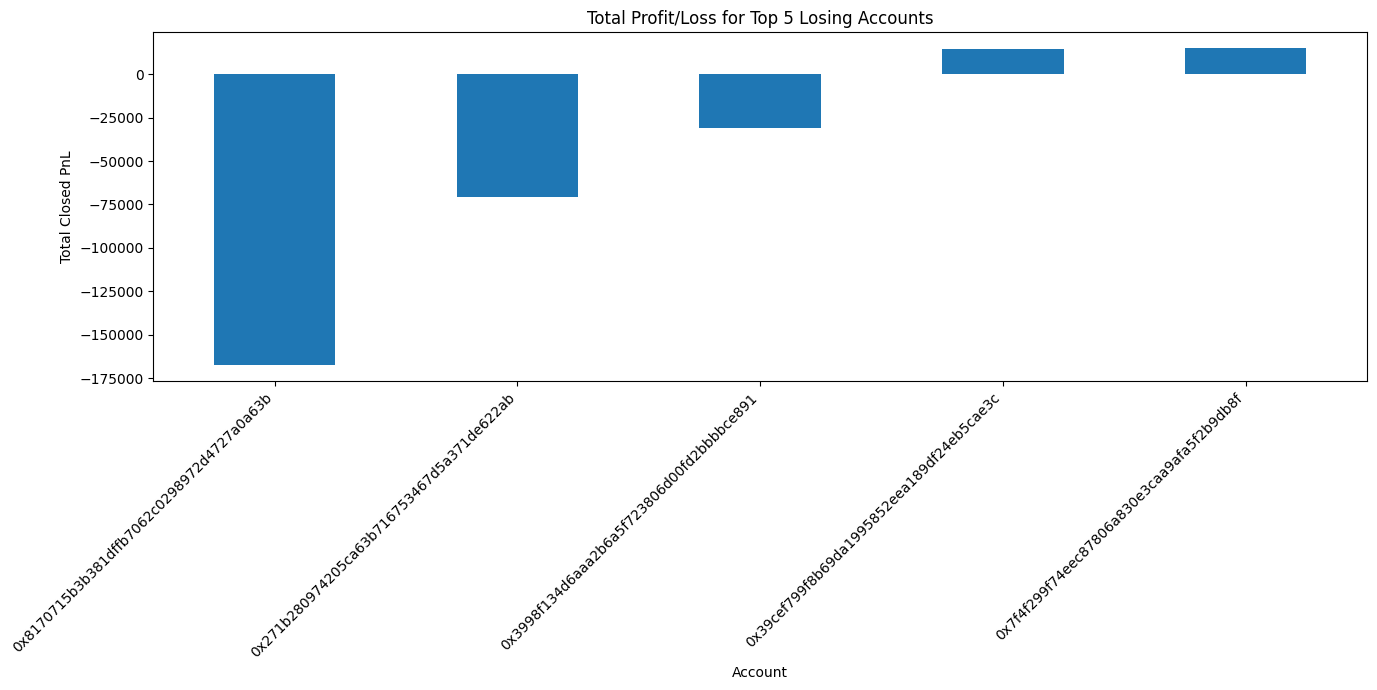

In [ ]:
plt.figure(figsize=(14, 7))
top_losing_accounts['Total Profit'].head(5).plot(kind='bar')
plt.title('Total Profit/Loss for Top 5 Losing Accounts')
plt.xlabel('Account')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def categorize_profit(pnl):
    if pnl > 0:
        return 'Profit'
    elif pnl < 0:
        return 'Loss'
    else:
        return 'Break-Even'

df['Profit Status'] = df['Closed PnL'].apply(categorize_profit)

display(df[['Closed PnL', 'Profit Status']].head())

,Closed PnL,Profit Status
0,0.0,Break-Even
1,0.0,Break-Even
2,0.0,Break-Even
3,0.0,Break-Even
4,0.0,Break-Even


In [ ]:
# Perform one-hot encoding on 'Profit Status'
df = pd.get_dummies(df, columns=['Profit Status'], prefix='Profit_Status')

# Display the first few rows to show the new columns
display(df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Timestamp,Profit_Status_Break-Even,Profit_Status_Loss,Profit_Status_Profit
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,1.730000e+12,True,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,1.730000e+12,True,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,1.730000e+12,True,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,1.730000e+12,True,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,1.730000e+12,True,False,False


In [ ]:
# Create a 'Total Volume' column by summing 'Size Tokens' and 'Size USD' (assuming they represent different aspects of volume or can be combined)
df['Total Volume'] = df['Size Tokens'] + df['Size USD']

# Display the first few rows with the new column
display(df[['Size Tokens', 'Size USD', 'Total Volume']].head())

,Size Tokens,Size USD,Total Volume
0,986.87,7872.16,8859.03
1,16.00,127.68,143.68
2,144.09,1150.63,1294.72
3,142.98,1142.04,1285.02
4,8.73,69.75,78.48


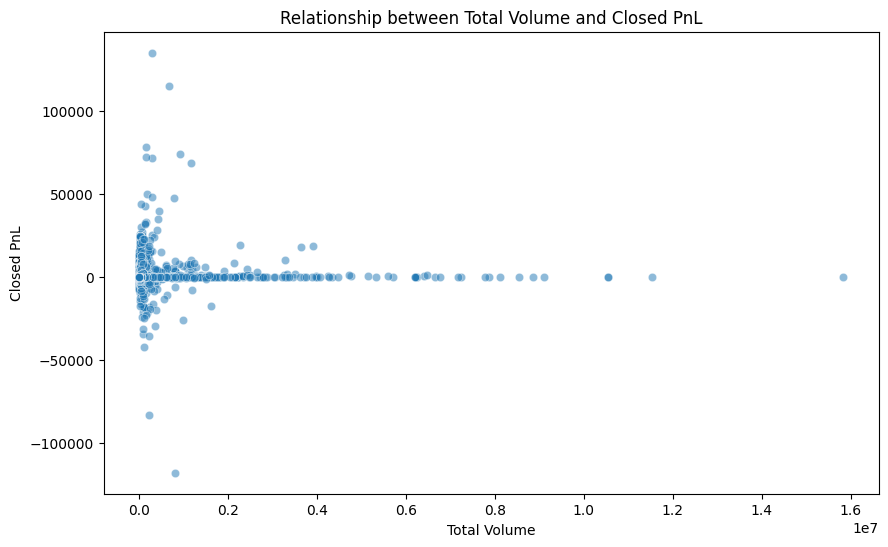

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Volume', y='Closed PnL', alpha=0.5)
plt.title('Relationship between Total Volume and Closed PnL')
plt.xlabel('Total Volume')
plt.ylabel('Closed PnL')
plt.show()

In [ ]:
# Create a 'Risk Indicator' column based on the absolute value of 'Closed PnL'
df['Risk Indicator'] = df['Closed PnL'].abs()

# Display the first few rows with the new column
display(df[['Closed PnL', 'Risk Indicator']].head())

,Closed PnL,Risk Indicator
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


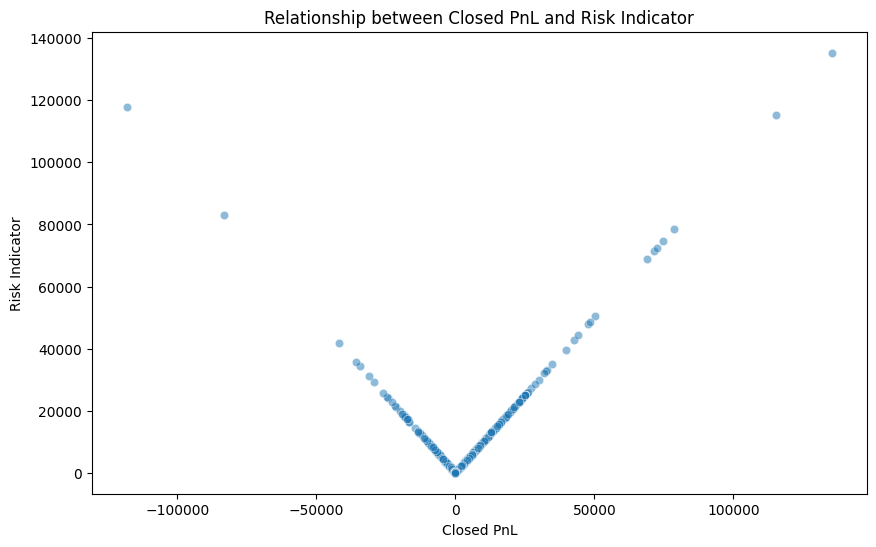

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Closed PnL', y='Risk Indicator', alpha=0.5)
plt.title('Relationship between Closed PnL and Risk Indicator')
plt.xlabel('Closed PnL')
plt.ylabel('Risk Indicator')
plt.show()

In [ ]:
df.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Timestamp,Profit_Status_Break-Even,Profit_Status_Loss,Profit_Status_Profit,Total Volume,Risk Indicator
201878,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,0.82344,2062.80,1698.59,SELL,2025-01-29 03:59:00,-117528.600,Open Short,0.000000,1.740000e+12,True,False,False,3761.39,0.000000
158900,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,26.60000,22.37,595.04,SELL,2024-12-16 20:08:00,39807.438,Sell,112.721857,1.730000e+12,False,False,True,617.41,112.721857
85715,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,HYPE,24.14700,1.41,34.05,BUY,2024-12-15 05:58:00,1419.900,Open Long,0.000000,1.730000e+12,True,False,False,35.46,0.000000
173690,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.80000,2.00,39.60,BUY,2025-02-27 08:34:00,-2235.990,Close Short,1.622400,1.740000e+12,False,False,True,41.60,1.622400
70685,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,16.04200,301.37,4834.58,BUY,2025-03-04 13:38:00,179384.860,Open Long,0.000000,1.740000e+12,True,False,False,5135.95,0.000000


In [ ]:
df['Risk Indicator'].value_counts()

,count
Risk Indicator,
0.000000,106816
0.146908,80
1.566400,71
9.903600,67
88.459120,62
...,...
19.306133,1
1.553881,1
458.961591,1


In [ ]:
df.shape

(211224, 16)

In [ ]:
df.to_csv('new_df.csv', index=False)

### Analysis Summary

Based on the analysis performed, the following key observations were made:

- The dataset contains trading data with various attributes including Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Timestamp, Profit Status, Total Volume, and Risk Indicator.
- Several columns like 'Transaction Hash', 'Crossed', 'Order ID', 'Fee', and 'Trade ID' were dropped due to lack of clear relationships with other columns.
- The distribution of trades across different accounts shows that some accounts have significantly more transactions than others.
- Top accounts show interest in various coins, with some concentration in specific coins like HBAR and @103, while smaller accounts tend to trade more in BTC.
- The relationship between 'Side' (BUY/SELL) and 'Direction' indicates that 'Open Long' is a prevalent trading strategy.
- The analysis of 'Start Position' and 'Closed PnL' for top coins reveals the range of initial positions and profitability for these coins.
- The distribution of 'Closed PnL' shows a wide range of profit and loss values.
- An analysis of losing trades identified the accounts with the highest number of losing trades.
- A breakdown of total profit/loss by account and side highlights the overall profitability of each account for BUY and SELL trades.
- The top profitable and top losing accounts were identified based on their total 'Closed PnL'.
- New columns 'Profit Status', 'Total Volume', and 'Risk Indicator' were created to further analyze profitability, trading volume, and risk.
- Scatter plots were used to visualize the relationships between 'Start Position' and 'Closed PnL', and 'Size Tokens' and 'Size USD', and 'Total Volume' and 'Closed PnL'.

Overall, the analysis provides insights into the trading behavior of different accounts, the performance of various coins, and the distribution of profitability and risk within the dataset.